Capstone Project
Danny Clifford
October 2018


# I. Definition

### Project Overview

With much better memory than people and the amount of personal information we share with computers, it's amazing they don't appear to understand our personalities better.  With the exceptions of saving searches and some companies using AI and machine learning to predict profitability for advertisements, there is little effort to understand personal tendencies to cater content for (and not just to) individuals. Even those multibillion dollar corporations aim to maximize advertisment profit, not to understand the fundamental features that make each of us unique.  

Understanding what connects us all, what makes each of us unique, what are our strengths and how can we harness everyone's strengths to build better lives for individuals and humanity, seem's far from the focus of their efforts.  For the first time in history, we are able to economically collect and process enough information to understand the patterns of human nature.  There have been good attempts in recent history of distinguishing the features of human processing that make certain people different than others, most notably Carl Jung in his book Psychological Types and the subsequent adaptation of his theories to the Myers Briggs Personality Index.  

Carl Jung notes that it is difficult for a person who experiences their own bias to accurately judge others, joking that one person creating a system would be like creating a Universal Church with one member.  Luckily, since his time wonderful scientists such as Alan Turing, John von Neumann, J.C.R. Licklider, Miller, Moore, Noyce, and countless other have made it incredibly easy to collect, share, and calculate data from around the world almost instantly, not to mention make impressive improvements on models of understanding how agents behave.  With the addition of breakthroughs in behavioral psychology by greats like Kahnemann, Tversky, and Thaler, we are quickly building the ability to study the patterns of reason and thought in humans as differentiated by the rational agents which traditional economic theory implies.

Putting these pieces together, as we communicate with computers and people, we are creating valuable information and patterns that, if only captured and studied, would give great insight into how our individual and collective minds work.  This project is about helping individuals use computers understand how the patterns in our language reflect our inner personality and in turn how we recieve, process, and communicate information; which determines the outcomes in our personal lives and compounded over every individual over time, ammounts to the fate of humankind.  Ultimately, computers can be our tools to help us learn our unique patterns and to help us change, supplement, or leverage how we do things to help us solve problems and achieve our goals.

### Problem Statement
    
The problem that I am setting out to solve is how to understand someone's personality based on their use of language.  If we can accurately predict one of the most fundamental aspects of a person’s behavior and uniqueness as measured by the language they use, the ability to communicate information with that person will be drastically improved.  The internet is designed based on information that is already programmed into the web page itself; for example, administrators see a website much differently as a new customer or even a logged in user and are determined prior to visiting the webpage. This poses a difficult problem for web designers to incorporate designs that maximize the profit or usefulness to their intended audience rather than communicating information or value to a person on an individual basis.  If we can predict learning style or how an individual will react to their environment, then we can better customize the learning experience to their preferences and strengths. 
    
Quantifying personality has been done for us with the Myers Brigg Personality Index 4 letter code. These will be further broken down into their 4 features of a single letter with only 2 options.  In addition, it will also allow us to train the weights of determining individual features of personality in a more focused way. NLP allows algorithms to extract meaning from text whether from word count, frequency, parts of speech, and even sentiment in a quantifiable and measurable way. These matrices of language data will be learned by a Deep Neural Network and these patterns recognized during training will be used to predict the personality features of the test group.  

1. Download the data from Kaggle
2. Let SpaCy web-medium language model run through the posts to make word vectors
3. Shuffle-Split the data into testing, validation, and training data
4. Run benchmarks training and testing with Logistic Regression, Random Forest, and MLP Classifiers
5. Run training and validation through the DNN
6. Test accuracy of the models on the test set with AUC
  
    
### Metrics

Training a neural network on language use and their corresponding personality feature labels allows us to measure the AUC.  Area under the ROC curve is used to ensure the proper binary classification when it comes to specificity and sensitivity. This will help better quantify individual differences in each of the 4 personality features. Wang uses AUC in order to quantify and measure accuracy of his models.  Since the distribution of personalities within the dataset is skewed in both our datasets, this will be a good evaluation metric to use.  He also measured accuracy by comparing different models based on the features mentioned above based on AUC, not only breaking them down into dichotomous features (Sensing and Intuitive, Extrovert and Introvert), but also by focusing on features of the language.  

# II. Analysis

### Data Exploration

The dataset is taken from Kaggle and contains 8,600 users with 50 recent comments on the Kaggle website each and their corresponding personality type.  This was user generated data from the Kaggle website and offers the most labeled personality data connected to their text data (comments) of what I could find online. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the excel document with the results
# save it as a panda's dataframe and call it data
data = pd.read_csv('raw/mbti_1.csv')

# print out a summary of the first 5 people to make sure it worked
print(data.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [2]:
import spacy

nlp = spacy.load('en_core_web_md')

This is the first 5 entries of the Kaggle dataset. It comes with a 4 letter code called 'type' which is the person's peronality archetype according to their test results from the Myers Briggs Personality Index. Under 'posts' is a string of their most recent 50 posts on Kaggle.com separated by |||. 

Below is a look at the first person's entire corpus of text that we can learn from in raw form. In Data Preprocessing we will remove the links and ||| along with creating a bag of words that a the person uses that we can compare to other people and personality types.

### Exploratory Visualization

The bar graph below shows the distribution of the personality types in the Kaggle database. 

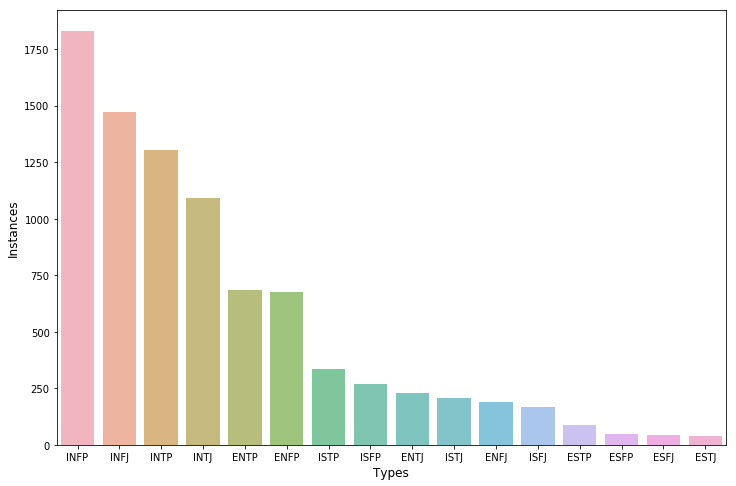

In [3]:
d = data['type'].value_counts()
k = data['type'].value_counts().keys()

plt.figure(figsize=(12,8))
sns.barplot(d.index, d.values, alpha=0.7)
plt.ylabel('Instances', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Clearly Introverted and/ or iNtuitive people dominate the Kaggle forums, or at least the ones participating in the creation of the database.  This will make it quite difficult to learn about those who are extroverted and sensing types (ESxx).  The model would likely minimize error by simply never predicting ESxx labels.

In [4]:
#distribution = {}
#actual_series = {}

l = float(len(data))
actual = [0.044, 0.015, 0.033, 0.021, 0.032, 0.081, 0.054, 0.088, 0.018, 0.116, 0.025, 0.138, 0.043, 0.085, 0.123, 0.087]
kaggle = []

for i in range(len(d)):
    kaggle.append(float(d[i]) / l)

keys = d.index.get_values()
values = d.get_values()


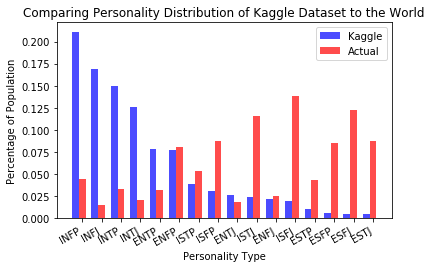

In [5]:
from matplotlib import style 

fig, ax = plt.subplots(1) 
fig.autofmt_xdate()
index = np.arange(16)
bar_width = 7
opacity = 0.7

kaggle_bar = plt.bar(index*20, kaggle, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Kaggle')
actual_bar = plt.bar(index*20 + bar_width, actual, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Actual')

plt.xlabel('Personality Type')
plt.ylabel('Percentage of Population')
plt.title('Comparing Personality Distribution of Kaggle Dataset to the World')
plt.xticks(index*20 + bar_width, keys)
plt.legend()
plt.show()

The bar graph above compares the percentage of people who belong to each type on the Kaggle database and Myers-Briggs world estimates.  If the data weren't already skewed enough, the people's personalities of this dataset are quite different to the general population.  When it comes to creating a system for understanding personality, the data used to train the model would ideally represent the population of personalities it is trying to understand.

Insert Facets

### Algorithms and Techniques

Preprocessing the data will be the largest part of the technique for predicting the personality of a person based on their text.  There are separating characters (|||) that need to be removed, links that will not show up in language and instead will be converted simply into the word 'link'.  

As mentioned in the Data Exploration section above, using the bag of words technique to create word vectors of each personality type's language. Using spaCy's medium web language library to create relative frequencies of common language used online, the result will be a model of language use specific to each personality feature.  In addition, spaCy can find the similarities of new sentences to each corresponding personality and even between personalities.  

The classifier is a Deep Neural Network, that will run over the language and assign the probability for each class based on their word vector representations.

Since the data is quite skewed not only from the population but especially not distributed evenly throughout the personality types, creating a model that will most accurately predict the personality type will likely result in simply guessing the most likely personality features, in this case Introverted and Intuitive (IN).  Tuning the model based on the AUC and series of 4 binary classifications (which coincidentally also makes more sense in the study of personality) allows to create the most potentially useful prediction model and avoid overfitting.  

Calculating AUC not only tries to get the most predictions right, but tries to ensure that false positives and false negatives don't crop up.  In other words, since the accuracy metric would tend to create a prediction where everyone is IN__, the AUC metric will catch that the model systematically falsely assigns Extroverts the Introvert label and will look for patterns to help correct it, even if retroactively.  It will be used as an evaluation of the quality of the models and a window into how much information was actually learned.

I also have read that AUC on skewed datasets is overused and doesn't necessarily represent a good way to compare models. To compensate, I added F1_score which was suggested on a few forums. https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score

### Benchmark

The Benchmark I will be using to predict personality based on the data is a Logistic Regression, Random Forrest Classifier, and Support Vector Machine Classification algorithms, as I am trying to make a similar model to Yilun Wang's in his Understanding Personality through Social Media.

The average AUC across the four binary predictions he achieved with his best model was 0.661 using a large repository of Tweets of around 90,000 twitter users.  Of course this dataset is much more skewed and smaller.  I used another top kernel from kaggle with this same dataset where F1_score was used. His best models created an average F1_score of 0.665.
See links for these projects in the conclusion.

# III. Methodology

### Data Preprocessing

First, we must do a little clean up of the data. Below shows the posts being split where '|||'s are, and saved into an array of posts.  Then save the posts and type to a list (keep_list and type_list respectively) to save into a DataFrame called frame.

In [10]:
keep_list = []
type_list = []

for i in range(len(data.type)): 
    string = data['posts'][i]
    temp = np.array(string.split('|||'))
    keep_list.append(temp)
    type_list.append(df['type'][i])
    if i%2000 == 0:
        print(i)

frame = pd.DataFrame({
    'posts' : keep_list,
    'type'  : type_list
})

0
1000
2000
3000
4000
5000
6000
7000
8000


Next, remove the hyperlinks and replace them with the word link. I figured this would act as a way to preserve the information that at least there was a link involved.

In [12]:
# Go through each post to remove links
import re
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

for posts in frame.posts:
    for i in range(len(posts)):
        posts[i] = pattern.sub('link', posts[i])
    
print(frame.tail())

                                                  posts  type
8670  ['link, IxFP just because I always think of ca...  ISFP
8671  ['So...if this thread already exists someplace...  ENFP
8672  ['So many questions when i do these things.  I...  INTP
8673  ['I am very conflicted right now when it comes...  INFP
8674  ['It has been too long since I have been on pe...  INFP


In order to make the more difficult prediction of 1 of 16 MBTI personality types, I want to give each prediction class a number rather than the string. (I did this because I ran into some issues with keras trying to predict the string and put it through to_categorical())

In [223]:
def type_to_numbers(type_list):
    
    label_list = []
    for i in type_list:
        if i == 'ENTP':
            label_list.append(0)
        if i == 'INTP':
            label_list.append(1)
        if i == 'ESTP':
            label_list.append(2)
        if i == 'ISTP':
            label_list.append(3)
        if i == 'ENFP':
            label_list.append(4)
        if i == 'INFP':
            label_list.append(5)
        if i == 'ESFP':
            label_list.append(6)
        if i == 'ISFP':
            label_list.append(7)
        if i == 'ENTJ':
            label_list.append(8)
        if i == 'INTJ':
            label_list.append(9)
        if i == 'ESTJ':
            label_list.append(10)
        if i == 'ISTJ':
            label_list.append(11)
        if i == 'ENFJ':
            label_list.append(12)
        if i == 'INFJ':
            label_list.append(13)
        if i == 'ESFJ':
            label_list.append(14)
        if i == 'ISFJ':
            label_list.append(15)
        
    return label_list

frame['label'] = type_to_numbers(type_list)
    
print(frame.head())

                                               posts  type  label  e  n  t  p
0  ['link, link, enfp and intj moments  link  spo...  INFJ     13  0  1  0  0
1  ['I'm finding the lack of me in these posts ve...  ENTP      0  1  1  1  1
2  ['Good one  _____   link, Of course, to which ...  INTP      1  0  1  1  1
3  ['Dear INTP,   I enjoyed our conversation the ...  INTJ      9  0  1  1  0
4  ['You're fired., That's another silly misconce...  ENTJ      8  1  1  1  0


I loop through each person and each post of each person, concatenate them into one string separated by commas, and run it through the SpaCy Natural Language Processing (NLP) model. Then save it to posts_vector_1d list.

*I tried making tensors of a person's language by processing each post with SpaCy and saving each of 50 to a numpy array, but I haven't gotten it to work in keras yet. It also take about 4 hours to process on my CPU

In [15]:
#posts_vector_2d_list = []
posts_vector_1d_list = []

c=0
for posts in frame.posts:
    #p = np.empty((50,300))
    all_posts = ""
    for i in range(len(posts)): 
        string = posts[i].tostring()
        s = string.decode('UTF-32')
        all_posts += s + ". "
        #post_doc = nlp(s)
        #p[i] = post_doc.vector
    all_posts_doc = nlp(all_posts)
    #posts_vector_2d_list.append(p)
    posts_vector_1d_list.append(all_posts_doc.vector)
    if c%1000==0:
        print(c)
    c+=1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500


Below we can loop through each person's the MBTI type and break it into 0/1 for I/E, S/N, F/T, and J/P respectively so we can predict individual features and functions of personality.

In [19]:
frame['e'] = 0
frame['n'] = 0
frame['t'] = 0
frame['p'] = 0


for i in range(len(type_list)): 
    if frame.type[i][0] == 'E':
        frame['e'][i] = 1
    if frame.type[i][1] == 'N':
        frame['n'][i] = 1
    if frame.type[i][2] == 'T':
        frame['t'][i] = 1
    if frame.type[i][3] == 'P':
        frame['p'][i] = 1
    if i%2000 == 0:
        print(i)

print(frame.head())

C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0


C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
                                               posts  type  label  e  n  t  p
0  ['link, link, enfp and intj moments  link  spo...  INFJ     13  0  1  0  0
1  ['I'm finding the lack of me in these posts ve...  ENTP      0  1  1  1  1
2  ['Good one  _____   link, Of course, to which ...  INTP      7  0  1  1  1
3  ['Dear INTP,   I enjoyed our conversation the ...  INTJ      9  0  1  1  0
4  ['You're fired., That's another silly misconce...  ENTJ      8  1  1  1  0


### Implementation

The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.

1. Preprocess the data, splitting the post string into an array of posts.
2. Remove the hyperlinks and relace with the word link
3. Process each post with SpaCy nlp library turning each post into an average word vector over the words of the post.
4. Save a pd.df of all the posts and their respective person's type for simple classifiers
5. Split the posts_df into train and test sets
6. Train on Logistic Regression, Random Forrest, and SVC Classifiers
7. Test accuracy, AUC, and F1 Score of different personality types and functions
8. Train on SKLearn MLPClassifier and test Acc, AUC, and F1 of each personality type/ function
9. Split persons_word_vector_df into train, valid, and test datasets
10. Input into keras DNN and train/ validate to create weights for each personality type/ function
11. Test accuracy, AUC, and F1 of keras models
12. Train, (Validate), and Test Multilabel Classification algorithms for each type of algorithm

### Refinement

Here I am implementing the benchmarks and Deep Learning algorithms. Any refinement beyond what you see here will be at the bottom labeled "Anything below is just code from me messing around too much, learning, or otherwise getting off task"

In [494]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
#scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve, f1_score

After importing all the libraries for the benchmark models, we enter into what will be a familiar cadence of steps:

Split the data into train and test sets, then create and fit the models, followed by measuring for accuracy.

### Benchmark for Extroversion vs. Introversion

In [497]:
X_train, X_test, y_train, y_test = train_test_split(posts_vector_1d_list, frame['e'], test_size=0.25, random_state=42, shuffle=True)

log_reg = LogisticRegression()
rnd_for = RandomForestClassifier()
svm_clf = svm.SVC(kernel="linear")

for model in (log_reg, rnd_for, svm_clf): #svm_clf,
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    print(model.__class__.__name__)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print("AUC: ", auc)
    f1score = metrics.f1_score(y_test, y_pred)
    print("F1 Score: ", f1score)

LogisticRegression
Accuracy:  0.7846934071000461
AUC:  0.51472747716303
F1 Score:  0.06786427145708582
RandomForestClassifier
Accuracy:  0.7699400645458737
AUC:  0.5228257509274403
F1 Score:  0.1381692573402418
SVC
Accuracy:  0.7819271553711388
AUC:  0.5


C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score:  0.0


### Benchmark for INtuition vs. Sensing

In [498]:
X_train, X_test, y_train, y_test = train_test_split(posts_vector_1d_list, frame['n'], test_size=0.25, random_state=42, shuffle=True)

log_reg = LogisticRegression()
rnd_for = RandomForestClassifier()
svm_clf = svm.SVC(kernel="linear")

for model in (log_reg, rnd_for, svm_clf): #svm_clf,
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    print(model.__class__.__name__)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print("AUC: ", auc)
    f1score = metrics.f1_score(y_test, y_pred)
    print("F1 Score: ", f1score)

LogisticRegression
Accuracy:  0.8575380359612724
AUC:  0.49946294307196565
F1 Score:  0.9233060312732689
RandomForestClassifier
Accuracy:  0.8409405255878285
AUC:  0.5210790470825739
F1 Score:  0.9125918419052446
SVC
Accuracy:  0.8584601198709082
AUC:  0.5
F1 Score:  0.923840238154304


### Benchmark for Thinking vs. Feeling

In [499]:
X_train, X_test, y_train, y_test = train_test_split(posts_vector_1d_list, frame['t'], test_size=0.25, random_state=42, shuffle=True)

log_reg = LogisticRegression()
rnd_for = RandomForestClassifier()
svm_clf = svm.SVC(kernel="linear")

for model in (log_reg, rnd_for, svm_clf): #svm_clf,
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    print(model.__class__.__name__)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    print("AUC: ", auc)
    f1score = metrics.f1_score(y_test, y_pred)
    print("F1 Score: ", f1score)

LogisticRegression
Accuracy:  0.7584140156754264
AUC:  0.7539748631351686
F1 Score:  0.7265135699373694
RandomForestClassifier
Accuracy:  0.6685108344859382
AUC:  0.6569473359549696
F1 Score:  0.5907797381900968
SVC
Accuracy:  0.7736284001844168
AUC:  0.7708844166859433
F1 Score:  0.7488491048593351


### Benchmark for Perceiving vs. Judging

In [500]:
X_train, X_test, y_train, y_test = train_test_split(posts_vector_1d_list, frame['p'], test_size=0.25, random_state=42, shuffle=True)

log_reg = LogisticRegression()
rnd_for = RandomForestClassifier()
svm_clf = svm.SVC(kernel="linear")

for model in (log_reg, rnd_for, svm_clf): #svm_clf,
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    print(model.__class__.__name__)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print("AUC: ", auc)
    f1score = metrics.f1_score(y_test, y_pred)
    print("F1 Score: ", f1score)

LogisticRegression
Accuracy:  0.6454587367450438
AUC:  0.5728658574786054
F1 Score:  0.7559504919073311
RandomForestClassifier
Accuracy:  0.5859843245735362
AUC:  0.5685350128072716
F1 Score:  0.6564651874521805
SVC
Accuracy:  0.6256339326878746
AUC:  0.5206361750380817
F1 Score:  0.763953488372093


Above we have 

In [564]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

for label in [frame['e'], frame['n'], frame['t'], frame['p']]:
    X_train, X_test, y_train, y_test = train_test_split(posts_vector_1d_list, label, test_size=0.25, random_state=42, shuffle=True)
    simple_DNN = MLPClassifier()
    simple_DNN.fit(X_train, y_train)
    y_pred = simple_DNN.predict(X_test)
    print("Accruacy: ", accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    print("AUC: ", metrics.auc(fpr, tpr))
    print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accruacy:  0.8063623789764869
AUC:  0.6383506521999283
F1 Score:  0.4339622641509434
Accruacy:  0.8630705394190872
AUC:  0.5380488214486892
F1 Score:  0.925545249435949
Accruacy:  0.7897648686030428
AUC:  0.7879944482997918
F1 Score:  0.7692307692307693
Accruacy:  0.6809589672660212
AUC:  0.647889977392615
F1 Score:  0.7532097004279601


Clearly there is a drastic improvement in performance when the simple MultiLayer Perceptron Algorithm from sklearn over the baseline algorithms. 

In [591]:
import keras
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

In [948]:
model = Sequential()

model.add(Dense(300, activation='relu', input_shape=(300,)))
model.add(Dense(128, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_434 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_435 (Dense)            (None, 128)               38528     
_________________________________________________________________
dropout_188 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_436 (Dense)            (None, 16)                2064      
_________________________________________________________________
dropout_189 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_437 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_438 (Dense)            (None, 1)                 9         
Total para

In [949]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [975]:
X_train, X_test, y_train, y_test = train_test_split(train, frame['e'], test_size=0.25, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# train the model
checkpointer = ModelCheckpoint(filepath='Extrovert_Introvert_DNN.weights.best.hdf5', verbose=1, save_best_only=True)

# fit the model
#hist = model.fit(X_train, y_train, batch_size = 80, epochs =20, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)
hist = model.fit(X_train, y_train, batch_size = 75, epochs =25, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 4554 samples, validate on 1952 samples
Epoch 1/25
 - 1s - loss: 0.3809 - acc: 0.8377 - val_loss: 0.4445 - val_acc: 0.8048

Epoch 00001: val_loss improved from inf to 0.44454, saving model to Extrovert_Introvert_DNN.weights.best.hdf5
Epoch 2/25
 - 1s - loss: 0.3755 - acc: 0.8379 - val_loss: 0.4339 - val_acc: 0.8130

Epoch 00002: val_loss improved from 0.44454 to 0.43393, saving model to Extrovert_Introvert_DNN.weights.best.hdf5
Epoch 3/25
 - 1s - loss: 0.3736 - acc: 0.8386 - val_loss: 0.4354 - val_acc: 0.8130

Epoch 00003: val_loss did not improve
Epoch 4/25
 - 1s - loss: 0.3961 - acc: 0.8259 - val_loss: 0.4482 - val_acc: 0.7930

Epoch 00004: val_loss did not improve
Epoch 5/25
 - 1s - loss: 0.3801 - acc: 0.8340 - val_loss: 0.4644 - val_acc: 0.7915

Epoch 00005: val_loss did not improve
Epoch 6/25
 - 1s - loss: 0.3722 - acc: 0.8432 - val_loss: 0.4330 - val_acc: 0.8110

Epoch 00006: val_loss improved from 0.43393 to 0.43305, saving model to Extrovert_Introvert_DNN.weights.best.h

In [995]:
from sklearn import metrics
# load the model weights that had the best validation score
model.load_weights('Extrovert_Introvert_DNN.weights.best.hdf5')

# evaluate the model's accuracy
score = model.evaluate(X_test, y_test, verbose = 0)

# print the accuracy
print('\nTest accuracy: ', score[1])

y_pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: ", auc)
#https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous
print("F1 Score: ", metrics.f1_score(y_test, (y_pred>0.346).astype(int), pos_label=1))


Test accuracy:  0.8137390501436521
AUC:  0.8061750849782338
F1 Score:  0.5853211009174313


In [879]:
X_train, X_test, y_train, y_test = train_test_split(train, frame['n'], test_size=0.25, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
# train the model
checkpointer = ModelCheckpoint(filepath='Intuitive_Sensing_DNN.weights.best.hdf5', verbose=1, save_best_only=True)

# fit the model
hist = model.fit(X_train, y_train, batch_size = 32, epochs =50, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 4554 samples, validate on 1952 samples
Epoch 1/50
 - 1s - loss: 0.4537 - acc: 0.8445 - val_loss: 0.4010 - val_acc: 0.8648

Epoch 00001: val_loss improved from inf to 0.40104, saving model to Intuitive_Sensing_DNN.weights.best.hdf5
Epoch 2/50
 - 1s - loss: 0.4124 - acc: 0.8560 - val_loss: 0.3935 - val_acc: 0.8653

Epoch 00002: val_loss improved from 0.40104 to 0.39349, saving model to Intuitive_Sensing_DNN.weights.best.hdf5
Epoch 3/50
 - 1s - loss: 0.4089 - acc: 0.8564 - val_loss: 0.3817 - val_acc: 0.8653

Epoch 00003: val_loss improved from 0.39349 to 0.38168, saving model to Intuitive_Sensing_DNN.weights.best.hdf5
Epoch 4/50
 - 1s - loss: 0.4053 - acc: 0.8562 - val_loss: 0.4146 - val_acc: 0.8653

Epoch 00004: val_loss did not improve
Epoch 5/50
 - 1s - loss: 0.3930 - acc: 0.8564 - val_loss: 0.3828 - val_acc: 0.8658

Epoch 00005: val_loss did not improve
Epoch 6/50
 - 1s - loss: 0.3943 - acc: 0.8564 - val_loss: 0.3736 - val_acc: 0.8653

Epoch 00006: val_loss improved from 0.38

In [885]:
# load the model weights that had the best validation score
model.load_weights('Intuitive_Sensing_DNN.weights.best.hdf5')

# evaluate the model's accuracy
score = model.evaluate(X_test, y_test, verbose = 0)

# print the accuracy
print('\nTest accuracy: ', score[1])

y_pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: ", auc)
print("F1 Score: ", metrics.f1_score(y_test, (y_pred>0.5).astype(int), pos_label=1))


Test accuracy:  0.8810511753547021
AUC:  0.7696554209099011
F1 Score:  0.9354677338669335


In [934]:
model2 = Sequential()

model2.add(Dense(300, activation='relu', input_shape=(300,)))
model2.add(Dense(128, activation='relu'))
#model.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(train, frame['t'], test_size=0.25, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
# train the model
checkpointer = ModelCheckpoint(filepath='Thinking_Feeling_DNN.weights.best.hdf5', verbose=1, save_best_only=True)

# fit the model
hist = model2.fit(X_train, y_train, batch_size = 64, epochs =64, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_428 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_429 (Dense)            (None, 128)               38528     
_________________________________________________________________
dropout_185 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_430 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_186 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_431 (Dense)            (None, 16)                1040      
_________________________________________________________________
dropout_187 (Dropout)        (None, 16)                0         
__________


Epoch 00046: val_loss did not improve
Epoch 47/64
 - 1s - loss: 0.3942 - acc: 0.8171 - val_loss: 0.4470 - val_acc: 0.8012

Epoch 00047: val_loss improved from 0.44866 to 0.44696, saving model to Thinking_Feeling_DNN.weights.best.hdf5
Epoch 48/64
 - 1s - loss: 0.3938 - acc: 0.8217 - val_loss: 0.4508 - val_acc: 0.7915

Epoch 00048: val_loss did not improve
Epoch 49/64
 - 1s - loss: 0.4106 - acc: 0.8164 - val_loss: 0.4600 - val_acc: 0.7987

Epoch 00049: val_loss did not improve
Epoch 50/64
 - 1s - loss: 0.4054 - acc: 0.8155 - val_loss: 0.4532 - val_acc: 0.7900

Epoch 00050: val_loss did not improve
Epoch 51/64
 - 1s - loss: 0.3960 - acc: 0.8162 - val_loss: 0.5351 - val_acc: 0.7515

Epoch 00051: val_loss did not improve
Epoch 52/64
 - 1s - loss: 0.3934 - acc: 0.8252 - val_loss: 0.4520 - val_acc: 0.7930

Epoch 00052: val_loss did not improve
Epoch 53/64
 - 1s - loss: 0.4003 - acc: 0.8208 - val_loss: 0.4768 - val_acc: 0.7731

Epoch 00053: val_loss did not improve
Epoch 54/64
 - 1s - loss: 0

In [947]:
# load the model weights that had the best validation score
model2.load_weights('Thinking_Feeling_DNN.weights.best.hdf5')

# evaluate the model's accuracy
score = model2.evaluate(X_test, y_test, verbose = 0)

# print the accuracy
print('\nTest accuracy: ', score[1])

y_pred = model2.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print("AUC: ", auc)
print("F1 Score: ", metrics.f1_score(y_test, (y_pred>0.445).astype(int), pos_label=1))


Test accuracy:  0.8045182110472944
AUC:  0.8836045900251284
F1 Score:  0.8028846153846154


In [1028]:
X_train, X_test, y_train, y_test = train_test_split(train, frame['p'], test_size=0.25, random_state=1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
# train the model
checkpointer = ModelCheckpoint(filepath='Perceiving_Judging_DNN.weights.best.hdf5', verbose=1, save_best_only=True)

# fit the model
#hist = model.fit(X_train, y_train, batch_size = 64, epochs =30, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)
hist = model2.fit(X_train, y_train, batch_size = 32, epochs =30, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 4554 samples, validate on 1952 samples
Epoch 1/30
 - 1s - loss: 0.4680 - acc: 0.7778 - val_loss: 0.7068 - val_acc: 0.6732

Epoch 00001: val_loss improved from inf to 0.70676, saving model to Perceiving_Judging_DNN.weights.best.hdf5
Epoch 2/30
 - 1s - loss: 0.4599 - acc: 0.7828 - val_loss: 0.7788 - val_acc: 0.6824

Epoch 00002: val_loss did not improve
Epoch 3/30
 - 1s - loss: 0.4580 - acc: 0.7828 - val_loss: 0.7080 - val_acc: 0.6952

Epoch 00003: val_loss did not improve
Epoch 4/30
 - 1s - loss: 0.4631 - acc: 0.7809 - val_loss: 0.7148 - val_acc: 0.6988

Epoch 00004: val_loss did not improve
Epoch 5/30
 - 1s - loss: 0.4684 - acc: 0.7736 - val_loss: 0.7264 - val_acc: 0.6803

Epoch 00005: val_loss did not improve
Epoch 6/30
 - 1s - loss: 0.4565 - acc: 0.7804 - val_loss: 0.7139 - val_acc: 0.6942

Epoch 00006: val_loss did not improve
Epoch 7/30
 - 1s - loss: 0.4822 - acc: 0.7611 - val_loss: 0.7253 - val_acc: 0.7065

Epoch 00007: val_loss did not improve
Epoch 8/30
 - 1s - loss: 0.

In [1048]:
# load the model weights that had the best validation score
model2.load_weights('Perceiving_Judging_DNN.weights.best.hdf5')

# evaluate the model's accuracy
score = model2.evaluate(X_test, y_test, verbose = 0)

# print the accuracy
print('\nTest accuracy: ', score[1])

y_pred = model2.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("AUC: ", auc)
print("F1 Score: ", metrics.f1_score(y_test, (y_pred>0.43).astype(int), pos_label=1))


Test accuracy:  0.7040110648969946
AUC:  0.7505027390610914
F1 Score:  0.7830723092302565


In [1097]:
def guess_personality(string):
    weights = ['Extrovert_Introvert_DNN.weights.best.hdf5', 'Intuitive_Sensing_DNN.weights.best.hdf5']
    weights2 = ['Thinking_Feeling_DNN.weights.best.hdf5', 'Perceiving_Judging_DNN.weights.best.hdf5']

    guess = ""

    for w in weights:
        model.load_weights(w)
        doc = nlp(string)
        tester = doc.vector.reshape(1, -1)
        prediction = model.predict(tester)
        if w == weights[0]:
            print("Introverted = 0, Extroverted = 1: ", prediction[0][0])
            if prediction[0][0] < 0.346:
                guess += "I"
            else:
                guess += "E"
        if w == weights[1]:
            print("Sensing = 0, INtuitive = 1: ", prediction[0][0])
            if prediction[0][0] < 0.5:
                guess += "S"
            else:
                guess += "N"
    for w in weights2:
        model2.load_weights(w)
        doc = nlp(string)
        tester = doc.vector.reshape(1, -1)
        prediction = model.predict(tester)
        if w == weights2[0]:
            print("Feeling = 0, Thinking = 1: ", prediction[0][0])
            if prediction[0][0] < 0.445:
                guess += "F"
            else:
                guess += "T"
        if w == weights2[1]:
            print("Judging = 0, Perceiving = 1: ", prediction[0][0])
            if prediction[0][0] < 0.43:
                guess += "J"
            else:
                guess += "P"
    return guess

In [1098]:
string = "Enter anything you'd like here and I'll guess your personality. I'm and ENTP, so let's see how it works"

guess = guess_personality(string)
print(guess)

Introverted = 0, Extroverted = 1:  0.9480639
Sensing = 0, INtuitive = 1:  0.7915955
Feeling = 0, Thinking = 1:  0.7915955
Judging = 0, Perceiving = 1:  0.7915955
ENTP


## Results

### Model Evaluation and Validation
The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.

### Justification

Although the final model performed much better than the benchmark, I would not say this solution adequately solves the problem of developing a tool to help understand people's personality through their language.  Simply getting near 80% accuracy of understanding a generalization of people is not enough. Much work is to be done before we can begin to use our computers as tools for understanding human personality and behavior in a meaningful way.

The final results with the comparieson to the benchmarks are shown below.

# V. Conclusion

### Free Form Visualization

### Extroversion vs. Introversion
#### LogisticRegression
Accuracy:  0.7846934071000461
AUC:  0.51472747716303
F1 Score:  0.06786427145708582
#### RandomForestClassifier
Accuracy:  0.7699400645458737
AUC:  0.5228257509274403
F1 Score:  0.1381692573402418
#### SVC
Accuracy:  0.7819271553711388
AUC:  0.5
#### MLPClassifier
Accruacy:  0.8063623789764869
AUC:  0.6383506521999283
F1 Score:  0.4339622641509434
#### Keras Deep Learning Model
Test accuracy:  0.8137390501436521
AUC:  0.8061750849782338
F1 Score:  0.5853211009174313


### INtuitive vs. Sensing
#### LogisticRegression
Accuracy:  0.8575380359612724
AUC:  0.49946294307196565
F1 Score:  0.9233060312732689
#### RandomForestClassifier
Accuracy:  0.8409405255878285
AUC:  0.5210790470825739
F1 Score:  0.9125918419052446
#### SVC
Accuracy:  0.8584601198709082
AUC:  0.5
F1 Score:  0.923840238154304
#### MLPClassifier
Accruacy:  0.8630705394190872
AUC:  0.5380488214486892
F1 Score:  0.925545249435949
#### Keras Deep Learning Model
Test accuracy:  0.8810511753547021
AUC:  0.7696554209099011
F1 Score:  0.9354677338669335


### Thinking vs. Feeling
#### LogisticRegression
Accuracy:  0.7584140156754264
AUC:  0.7539748631351686
F1 Score:  0.7265135699373694
#### RandomForestClassifier
Accuracy:  0.6685108344859382
AUC:  0.6569473359549696
F1 Score:  0.5907797381900968
#### SVC
Accuracy:  0.7736284001844168
AUC:  0.7708844166859433
F1 Score:  0.7488491048593351
#### MLPClassifier
Accruacy:  0.7897648686030428
AUC:  0.7879944482997918
F1 Score:  0.7692307692307693
#### Keras Deep Learning Model
Test accuracy:  0.8045182110472944
AUC:  0.8836045900251284
F1 Score:  0.8028846153846154

### Perceiving vs. Jud
#### LogisticRegression
Accuracy:  0.6454587367450438
AUC:  0.5728658574786054
F1 Score:  0.7559504919073311
#### RandomForestClassifier
Accuracy:  0.5859843245735362
AUC:  0.5685350128072716
F1 Score:  0.6564651874521805
#### SVC
Accuracy:  0.6256339326878746
AUC:  0.5206361750380817
F1 Score:  0.763953488372093
#### MLPClassifier
Accruacy:  0.6809589672660212
AUC:  0.647889977392615
F1 Score:  0.7532097004279601
#### Keras Deep Learning Model
Test accuracy:  0.7040110648969946
AUC:  0.7505027390610914
F1 Score:  0.7830723092302565

https://nlp.stanford.edu/courses/cs224n/2015/reports/6.pdf
#### Understanding Personality through Social Media
#### AUC
    E/I - 
        Theirs: 0.691
        Mine: 0.806
    N/S - 
        Theirs: 0.653
        Mine: 0.7696
    T/F - 
        Theirs: 0.68
        Mine: 0.8836
    P/J -
        Theirs: 0.61
        Mine: 0.75
        
    Average -
        Theirs: 0.661
        Mine: 0.803

https://www.kaggle.com/depture/multiclass-and-multi-output-classification/notebook
#### Best Kaggle Project I could make sense of

#### F1_Score
    E/I - 
        Theirs: 0.59
        Mine: 0.585
    N/S - 
        Theirs: 0.44
        Mine: 0.935
    T/F - 
        Theirs: 0.8
        Mine: 0.80288
    P/J -
        Theirs: 0.83
        Mine: 0.783
        
    Average -
        Theirs: 0.665
        Mine: 0.776
        
#### My Accuracy
    E/I - 0.8137
    N/S - 0.881
    T/F - 0.804
    P/J - 0.704
    
    Average - 0.800675

### Reflection

One particular thing I found difficult was preprocessing the data for the Keras/ Tensorflow Neural Network.  For the simple classifiers I had to input a 1D stream of data, whereas I needed 3 dimensions for the LSTM NN. At first I was getting very confused, going back and forth between different preprocessing methods getting one to fit and then not the other. I did not realize that I needed to make two separate datasets in order to make this project work.  However, what I found interesting was that the SpaCy word vectors take into account dependencies and time series when creating word vectors. Since this is information is encapsulated, then the LSTM can focus on more broad patterns than one understanding and predicting the likelihood of seeing the phrase.  Finding the right mix of abstraction of language without losing information in the averaged word vectors will be integral in understanding the patterns of the human psyche through language.

Another interesting thing I had trouble with was one-hot encoding the personality data. Since there are 16 different personality types, one method would be to make each prediction class equivalent to one personality type resulting in an array of length 16. Another way would be to predict whether or not each person was Introverted, Extroverted, iNtuitive, Sensing, Thinking, Feeling, Perceiving, or Judging, resulting in an array of length 8.  Or even take it one step further, since one cannot be both Introverted and Extroverted according to the MBTI, we could assign Extroverted a value of 1 and Introverted a value of 0.  This would result in an array of length 4. 

### Improvement

One aspect of the implementation that could have been improved making 2D or 3D tensors and cleaning the data in a way that didn't require losing people with less than 50 posts and any post after the 50th one, losing information from links, or result in a skewed distribution of classes in the dataset. I ran into trouble just cleaning the data, and never was able to get a 2D or greater tensor to fit into keras. This way, the most information would be preserved by the corpus of the users and the model would result in a more transferrable prediction to the general population, rather than specifically Kaggle members.  This would increase the dimensionality of the data further and allow for a convolutional neural network, however, this takes more than 2 days to process on my quad-core processor and requires padding or otherwise losing information in some posts as some people use more words than others.

Other improvements would be to use much better data, this is clearly skewed toward Introverts and Intuitive Functioning personalities.  Getting more information from links, removing the types from posts, as well as adding other features like post count, number of words per post, characters per word, weighing certain words more heavily, among many many others.  I also tried breaking the problem into smaller sections, learning on introverts to create weights that would better predict the remaining features given the person is introverted. This way, I could create hidden markov models with hidden variables that are extracted from individual filters to create a new model that would predict more accurately.

Below are some way's I attempted this among many other things.

###  Anything below is just code from me messing around too much, learning, or otherwise getting off task.

In [ ]:
df_vector_list = []
df_label_list = []
df_vector_norm_list = []
df_post_list = []
df_index_list = []
e_list = []
n_list = []
t_list = [] 
p_list = []
word_vectors = []
vector_norms = []


for i in range(len(data.type)):
    # go through each person in the dataframe, with a fresh list of vectors for 
    #persons_comments = ""
    #list_of_vectors = []
    #list_of_vector_norms = []
    persons_comments = ""
    for post in data.posts[i]:
        
    label = [data.iloc[i]['e'], data.iloc[i]['n'], data.iloc[i]['t'], data.iloc[i]['p']]

    for post in data.posts[i]:
        #persons_comments += post + ". "
        persons_comments += post + " "

        doc = nlp(post)
        df_vector_list.append(doc.vector)
        df_vector_norm_list.append(doc.vector_norm)
        df_post_list.append(post)
        df_index_list.append(i)
        df_label_list.append(label)
        e_list.append(label[0])
        n_list.append(label[1])
        t_list.append(label[2]) 
        p_list.append(label[3])
    # after each post has been gone through but before the moving on to the next person
        # I want a list of vector norms to append to df vector norm list
        # I want a vector describing the whole corpus
    #vector.append(doc.vector)
    #print(vectors.dtype)
    #data['word_vectors'][i] = vectors
    doc = nlp(persons_comments)
    word_vectors.append(doc.vector)
    vector_norms.append(doc.vector_norm)
    if i%1000 == 0:
        print(float(i)/8675.)if i%500 == 0:
        print(i)

post_data = { 'user_id' :  df_index_list,
              'label'   :  df_label_list,
        'word_vector'   :  df_vector_list,
        'vector_norm'   :  df_vector_norm_list,
             'post'     :  df_post_list,
             'links'    :  df_links_list
             'e'        :  e_list,
             'n'        :  n_list,
             't'        :  t_list,
             'p'        :  p_list
            }
post_df = pd.DataFrame.from_dict(post_data)
print(post_df.head())

for person in data.type:
    if check_E(person):
        if check_N(person):
            if check_T:
                if check_P:
                    label_list.append(1) #[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # ENTP
                else:
                    label_list.append(2) #[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ENTJ
            else:
                if check_P:
                    label_list.append(3) #[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ENFP
                else:
                    label_list.append(4) #[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ENFJ
                
        else:
            if check_T:
                if check_P:
                    label_list.append(5) #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ESTP
                else:
                    label_list.append(6) #[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ESTJ
            else:
                if check_P:
                    label_list.append(7) #[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ESFP
                else:
                    label_list.append(8) #[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # ESFJ
    else:
        if check_N(person):
            if check_T:
                if check_P:
                    label_list.append(9) #[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # INTP
                else:
                    label_list.append(10) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] # INTJ
            else:
                if check_P:
                    label_list.append(11) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] # INFP
                else:
                    label_list.append(12) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] # INFJ
                
        else:
            if check_T:
                if check_P:
                    label_list.append(13) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] # ISTP
                else:
                    label_list.append(14) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] # ISTJ
            else:
                if check_P:
                    label_list.append(15) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] # ISFP
                else:
                    label_list.append(16) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # ISFJ
    
print(label_list)


high_dim_vectors = []

for i in range(10):
    persons_hd_vectors = []
    persons_comments = ""
    #    print(data.posts[i])
    #for post in data.posts[i]:
    #    print(post)
    #    persons_comments += post + " "
    print(data.posts[i][:100])
    doc = nlp(data.posts[i][:100])
    persons_hd_vectors.append(doc.tensor)
    print(persons_hd_vectors[].shape)
    
# Go through each post, convert it to a doc.vector and it's associated type
post_list = []
type_by_post_list = []
vector = np.empty((7684, 50, 300))
vector_list = []
i = 0
for posts in frame.posts:
    t = type_dict[i]
    print(t)
    p = np.empty((50,300))
    for j in range(50):
        string = posts[j].tostring()
        strn = string.decode('UTF-16')
        print(strn)
        doc = nlp(strn)
        post_list.append(doc.vector)
        type_by_post_list.append(t)
        p[j] = doc.vector
    vector[i] = p
    vector_list.append(p)
    if i%100 == 0:
        print(i)
    print(i)
    i += 1
    print(i)
    
print(len(post_list))
print(len(type_by_post_list)) 
#print(len(vector))
print(len(vector_list))
#print(len(type_dict))



posts_dict = {
    "label" : type_by_post_list
    "vector" : post_list
}

posts_df = pd.DataFrame.fromdict(posts_dict)
print(posts_df.head())

import re

# Split the data at |||
vector = np.empty((8675, 30, 300))
simple_vector = np.empty(())
drop_list = []

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

for i in range(len(data.posts)):  
    p = np.empty((30,300))
    posts = data.posts[i]
    #print(posts)
    #data.posts[i] = posts.split('|||')
    posts = pattern.sub('link', posts)
    newnew = posts.split('|||')
    if len(newnew) >= 30:
        for j in range(30):
            doc = nlp(newnew[j])
            p[j] = doc.vector
        vector[i] = p
    else:
        #print(i, len(newnew))
        drop_list.append(i)
    if i%1000 == 0:
        print(float(i)/8675., "% done")
        
print(data.head())

word_vectors = []
vector_norms = []
data['e'] = 0
data['n'] = 0
data['t'] = 0
data['p'] = 0
    
for i in range(1): #len(data.type)
    persons_comments = ""
    if data.type[i][0] == 'E':
        data['e'][i] = 1
    if data.type[i][1] == 'N':
        data['n'][i] = 1
    if data.type[i][2] == 'T':
        data['t'][i] = 1
    if data.type[i][3] == 'P':
        data['p'][i] = 1
    #for post in data.posts[i]:
    #    persons_comments += post + " "
    #doc = nlp(persons_comments)
    doc = nlp(data.posts[i])
    word_vectors.append(doc.vector)
    vector_norms.append(doc.vector_norm)
    tester = doc.vector.reshape(1, -1)
    print(tester.shape)
    if i%1000 == 0:
        print(float(i)/8675.)

print(data.tail())


average_vector = []
i=0

for posts in keep_list:
    post = ""
    for p in posts:
        post += p + " "
    doc = nlp(post)
    average_vector.append(doc.vector)
    if i%1000 == 0:
        print(i)
    i += 1
    
    
    
    
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, activation ='relu', input_shape=(50, 1, 300)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(16, activation='softmax')) #softmax #tanh

model.summary()


posts_sentiment_list = []

i=0
for posts in frame.posts[:5]:
    p = []
    for i in range(len(posts)): 
        string = posts[i].tostring()
        s = string.decode('UTF-32')
        post_doc = nlp(s)
        p.append(post_doc.sentiment)
    posts_sentiment_list.append(p)
    i+=1
    if i%500 == 0:
        print(i)
print(posts_sentiment_list)

def type_to_numbers(type_list):
    
    hot_label_list = []
    for i in type_list:
        if i == 'ENTP':
            hot_label_list.append(np.array([1, 0, 1, 0, 1, 0, 1, 0]))
        if i == 'INTP':
            hot_label_list.append(np.array([0, 1, 1, 0, 1, 0, 1, 0]))
        if i == 'ESTP':
            hot_label_list.append(np.array([1, 0, 0, 1, 1, 0, 1, 0]))
        if i == 'ISTP':
            hot_label_list.append(np.array([ 0, 1, 0, 1, 1, 0, 1, 0]))
        if i == 'ENFP':
            hot_label_list.append(np.array([1, 0, 1, 0, 0, 1, 1, 0]))
        if i == 'INFP':
            hot_label_list.append(np.array([0, 1, 1, 0, 0, 1, 1, 0]))
        if i == 'ESFP':
            hot_label_list.append(np.array([1, 0, 0, 1, 0, 1, 1, 0]))
        if i == 'ISFP':
            hot_label_list.append(np.array([0, 1, 0, 1, 0, 1, 1, 0]))
        if i == 'ENTJ':
            hot_label_list.append(np.array([1, 0, 1, 0, 1, 0, 0, 1]))
        if i == 'INTJ':
            hot_label_list.append(np.array([0, 1, 0, 1, 1, 0, 0, 1]))
        if i == 'ESTJ':
            hot_label_list.append(np.array([1, 0, 0, 1, 1, 0, 0, 1]))
        if i == 'ISTJ':
            hot_label_list.append(np.array([0, 1, 0, 1, 1, 0, 0, 1]))
        if i == 'ENFJ':
            hot_label_list.append(np.array([1, 0, 1, 0, 0, 1, 0, 1]))
        if i == 'INFJ':
            hot_label_list.append(np.array([0, 1, 1, 0, 0, 1, 0, 1]))
        if i == 'ESFJ':
            hot_label_list.append(np.array([1, 0, 0, 1, 0, 1, 0, 1]))
        if i == 'ISFJ':
            hot_label_list.append(np.array([0, 1, 0, 1, 0, 1, 0, 1]))
        
    return hot_label_list
    



frame['hot_label'] = type_to_numbers(type_list)
    
print(len(type_list))

print(len(posts_vector_2d_list))
print(len(posts_vector_1d_list))
posts_vector_2d_list = word_tensors_df.values
print(len(posts_vector_2d_list))

word_vectors_df = pd.DataFrame({
    'posts' : posts_vector_1d_list,
    'label' : label_list
})

print(word_vectors_df.head())

word_tensors_df = pd.DataFrame({
    'posts' : posts_vector_2d_list,
    'label' : label_list
})

print(word_tensors_df.head())

word_vectors_df.to_csv("word_vectors.csv")
word_tensors_df.to_csv("word_tenors.csv")

wvdf = pd.read_csv("word_vectors.csv")
wtdf = pd.read_csv("word_tenors.csv")
print(wvdf.head())


# Remove any people with posts that have less than 50 posts in them
# Split the posts and save them as an array 
#drop_list = []
keep_list = []
type_list = []

df = data
df['num_posts'] = 0

for i in range(len(df.type)): 
    string = df['posts'][i]
    temp = np.array(string.split('|||'))
    #if len(temp) < 50:
    #    drop_list.append(i)
    if len(temp) >= 50:
        df['num_posts'][i] = 50
        temp = temp[:50]
        keep_list.append(temp)
        type_list.append(df['type'][i])
    if i%1000 == 0:
        print(i)
        
uniform_df = df[df["num_posts"] == 50]
uniform_df.reset_index(drop=False)
print(uniform_df.tail())

frame = pd.DataFrame({
    'posts' : keep_list,
    'type'  : type_list
})

# https://medium.com/@thongonary/how-to-compute-f1-score-for-each-epoch-in-keras-a1acd17715a2
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

class Metrics(Callback):

    def on_train_begin(self, logs={}):
         self.val_f1s = []
         self.val_recalls = []
         self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
         val_predict = (np.asarray(self.model.predict(X_val))).round()
         val_targ = y_val
         _val_f1 = f1_score(val_targ, val_predict)
         _val_recall = recall_score(val_targ, val_predict)
         _val_precision = precision_score(val_targ, val_predict)
         self.val_f1s.append(_val_f1)
         self.val_recalls.append(_val_recall)
         self.val_precisions.append(_val_precision)
         print("— val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))
         return
 
cb = Metrics()

In [380]:
EN_word_vector = []

extroverts = data.loc[data['e'] == 1]
introverts = data.loc[data['e'] == 0]

intuitive_introverts = introverts.loc[data['n'] == 1]
intuitive_extroverts = extroverts.loc[data['n'] == 1]

for i in intuitive_extroverts.index:
    persons_comments = ""
    for post in intuitive_extroverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    EN_word_vector.append(doc.vector)
    if i%500 == 0:
        print(i)
        
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(EN_word_vector, intuitive_extroverts['t'], test_size=0.25, random_state=42, shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    
    
IN_word_vector = []

for i in intuitive_introverts.index:
    persons_comments = ""
    for post in intuitive_introverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    IN_word_vector.append(doc.vector)
    if i%200 == 0:
        print(i)
        
X_train, X_test, y_train, y_test = train_test_split(IN_word_vector, intuitive_introverts['t'], test_size=0.25, random_state=42, shuffle=True)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    y_pred = clf.predict(E_word_vector)
    print(clf.__class__.__name__, accuracy_score(extroverts['t'], y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(extroverts['t'], y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    
    
E_word_vector = []
for i in extroverts.index:
    persons_comments = ""
    for post in extroverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    E_word_vector.append(doc.vector)
    if i%500 == 0:
        print(i)
        
y_pred = nn_clf.predict(E_word_vector)
print(clf.__class__.__name__, accuracy_score(extroverts['p'], y_pred))
fpr, tpr, thresholds = metrics.roc_curve(extroverts['p'], y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

#X_test_train, X_test_t, y_test_train, y_test_t = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_train)    
    print(clf.__class__.__name__, accuracy_score(y_test_train, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test_train, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)

nn_clf_2 = MLPClassifier()
#train_np = np.array(X_test_train)
#print(len(train_np))
#guess = y_pred.tolist()

print(X_test_train[0])

array = y_pred.reshape(-1, 1)
df = pd.DataFrame ({
    'vector': np.array(X_test_train,dtype='float32'),
    'pred'  : array
})

#print(X_test_train[:2])
#trainer = zip(X_test_train, guess)
#xtestrain = np.ndarray(list(trainer))
#print(xtestrain)
nn_clf_2.fit(array, y_test_train)
y_pred_2 = nn_clf_2.predict(df)
print(clf.__class__.__name__, accuracy_score(y_test_t, y_pred_2))
fpr, tpr, thresholds = metrics.roc_curve(y_test_train, y_pred_2, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

KeyError: 'e'